<a href="https://colab.research.google.com/github/SuyashPatil-max/Finlatics/blob/main/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML /Finlatics/DsResearch/Digital Marketing/online_advertising_performance_data.csv')
df.shape

(15408, 14)

In [3]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 12','Unnamed: 13'],axis =1 )
print(df.shape)
df.head()

(15408, 12)


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [5]:
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,413
displays,0
cost,0
clicks,0
revenue,0


In [6]:
df['placement'] = df['placement'].fillna(df['placement'].mode()[0])

In [7]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


# EDA

In [8]:
palet = ['#201E43','#134B70','#508C9B','#EEEEEE']
print('#11235A')

#11235A


/tmp/ipython-input-3670777653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='user_engagement',data =df ,palette =palet )
/tmp/ipython-input-3670777653.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x ='user_engagement',data =df ,palette =palet )


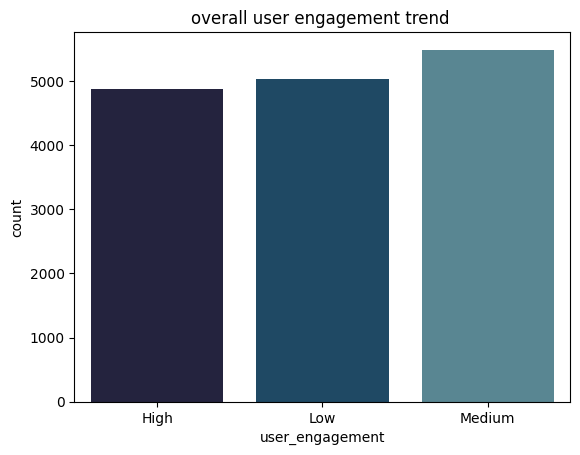

In [9]:
sns.countplot(x ='user_engagement',data =df ,palette =palet )
plt.title('overall user engagement trend ')
plt.show()

In [10]:
grp1 = df.groupby('banner')['clicks']
print(grp1.sum())

banner
160 x 600     239570
240 x 400    1113256
300 x 250     411214
468 x 60        1295
580 x 400     120681
670 x 90       37203
728 x 90      569606
800 x 250         12
Name: clicks, dtype: int64


In [11]:
idx =  grp1.sum().index
val = grp1.sum().values

/tmp/ipython-input-3214321084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = idx ,y = val , palette = palet)
/tmp/ipython-input-3214321084.py:2: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = idx ,y = val , palette = palet)


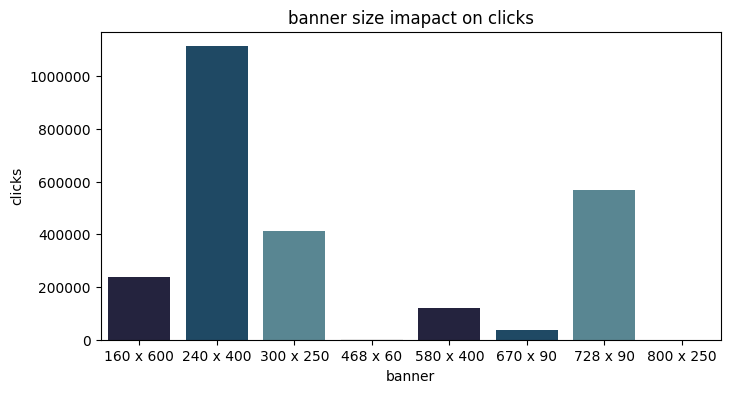

In [12]:
plt.figure(figsize = (8,4))
sns.barplot(x = idx ,y = val , palette = palet)
plt.ylabel('clicks')
plt.ticklabel_format(style='plain', axis='y')
plt.title('banner size imapact on clicks')
plt.show()

In [13]:
grp2 = df.groupby('placement')[['displays','clicks']]
grp2 = grp2.sum()

In [14]:
grp2

,displays,clicks
placement,,
abc,242142,1584
def,28177492,176097
ghi,59740415,1247049
jkl,7692732,75063
mno,143164944,993044


/tmp/ipython-input-3534395790.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp2.index , y = grp2['displays'] , palette = palet)
/tmp/ipython-input-3534395790.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp2.index , y = grp2['displays'] , palette = palet)


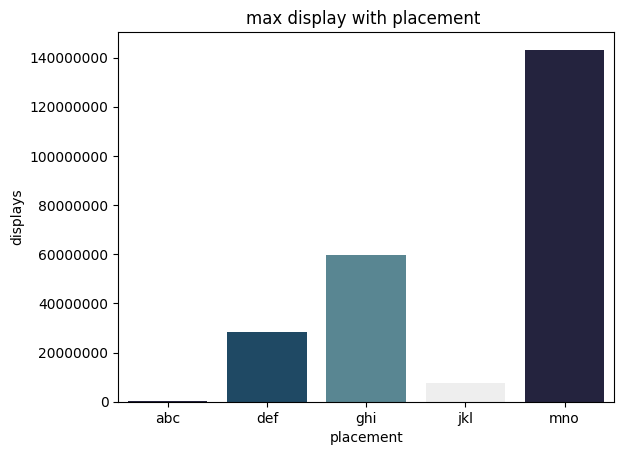

/tmp/ipython-input-3534395790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp2.index , y = grp2['clicks'] , palette = palet)
/tmp/ipython-input-3534395790.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp2.index , y = grp2['clicks'] , palette = palet)


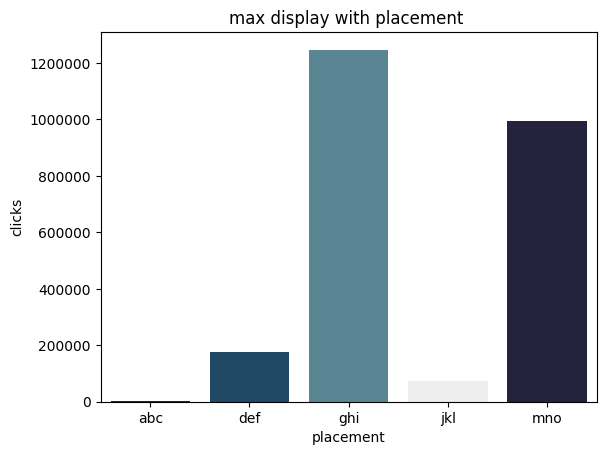

In [15]:
sns.barplot(x = grp2.index , y = grp2['displays'] , palette = palet)
plt.title('max display with placement ')
plt.ticklabel_format(style ='plain', axis = 'y')
plt.show()

sns.barplot(x = grp2.index , y = grp2['clicks'] , palette = palet)
plt.title('max display with placement ')
plt.ticklabel_format(style ='plain', axis = 'y')
plt.show()

In [16]:
df.corr(numeric_only= True)['cost']

,cost
day,-0.037462
displays,0.882151
cost,1.000000
clicks,0.672971
revenue,0.760520
post_click_conversions,0.841650
post_click_sales_amount,0.842063


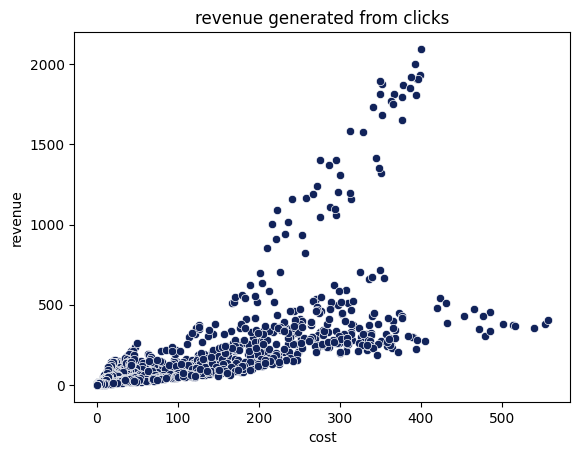

In [17]:
sns.scatterplot(x = 'cost' ,y = 'revenue',data =df ,color = '#11235A')
plt.title('revenue generated from clicks')
plt.show()

In [18]:
grp3 = df.groupby('campaign_number')[['clicks','revenue','post_click_conversions']]
grp3 = grp3.sum()

In [19]:
grp3

,clicks,revenue,post_click_conversions
campaign_number,,,
camp 1,1409136,230535.3563,633085
camp 2,881158,34890.4153,13767
camp 3,202543,10838.7905,4916


In [20]:
grp3['avg_revenue_per_click'] = grp3['revenue']/grp3['clicks']
grp3

,clicks,revenue,post_click_conversions,avg_revenue_per_click
campaign_number,,,,
camp 1,1409136,230535.3563,633085,0.163601
camp 2,881158,34890.4153,13767,0.039596
camp 3,202543,10838.7905,4916,0.053514


/tmp/ipython-input-2602404404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp3.index , y= grp3['post_click_conversions'] ,palette = palet)
/tmp/ipython-input-2602404404.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x = grp3.index , y= grp3['post_click_conversions'] ,palette = palet)


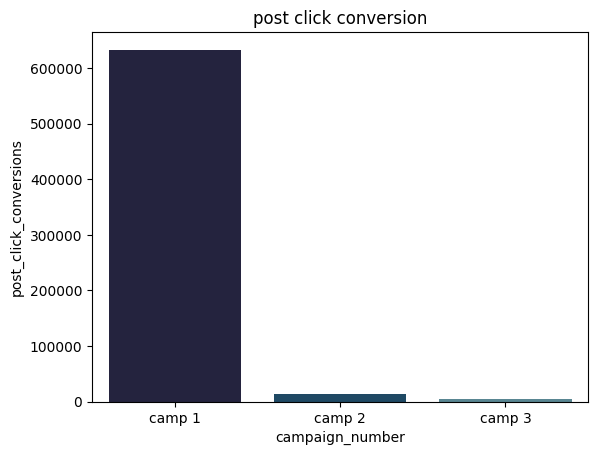

In [21]:
sns.barplot(x = grp3.index , y= grp3['post_click_conversions'] ,palette = palet)
plt.title('post click conversion')
plt.show()

['April' 'May' 'June']


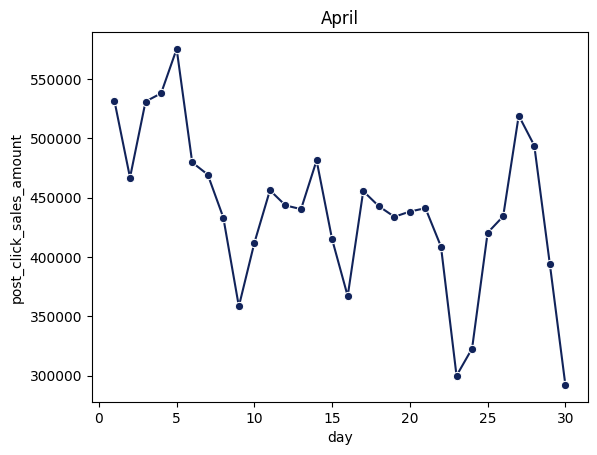

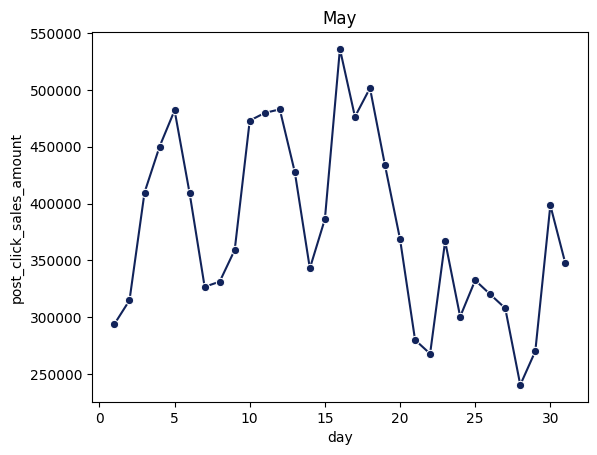

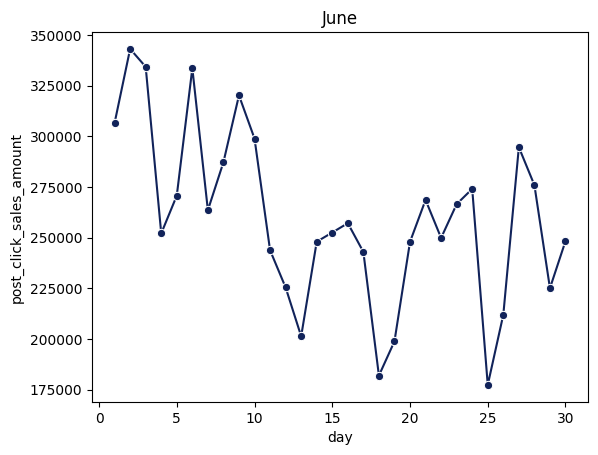

In [22]:
month = df['month'].unique()
print(month)

for i in month :
  temp = df[df['month'] == i]
  grp1 = temp.groupby('day')['post_click_sales_amount']
  grp1 = grp1.sum()

  sns.lineplot(x = grp1.index ,y=grp1 , color ='#11235A', marker='o',markersize=6)
  plt.title( i)
  plt.show()


In [23]:
grp1 = df.groupby('month')['post_click_sales_amount']
grp1 = grp1.sum()
grp1= grp1.reindex(["April", "May", "June"])
grp1

,post_click_sales_amount
month,
April,1.319614e+07
May,1.171772e+07
June,7.801759e+06


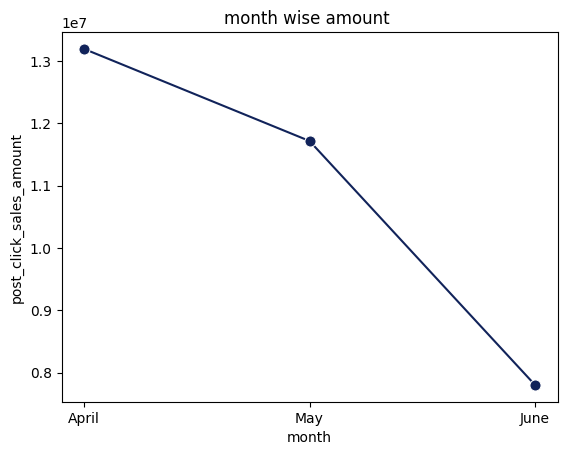

In [24]:
sns.lineplot(x = grp1.index ,y=grp1 , color ='#11235A',marker='o',markersize=8)
plt.title( 'month wise amount ')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/ax

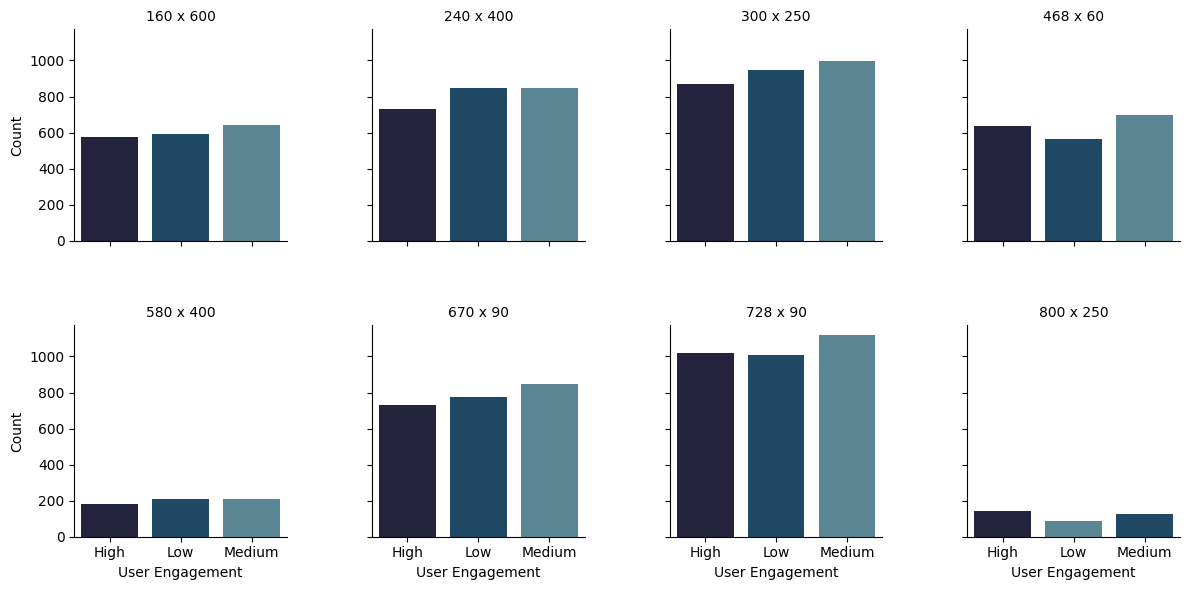

In [25]:
g = sns.FacetGrid(df,col="banner",col_wrap=4,    sharey=True)
g.map_dataframe(sns.countplot,x="user_engagement",palette=palet)

g.set_titles("{col_name}")
g.set_axis_labels("User Engagement", "Count")
g.fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [26]:
grp = df.groupby('placement')['post_click_conversions']
grp = grp.sum()
grp

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263172


/tmp/ipython-input-3293582241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp.index ,y=  grp , palette = palet)
/tmp/ipython-input-3293582241.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = grp.index ,y=  grp , palette = palet)


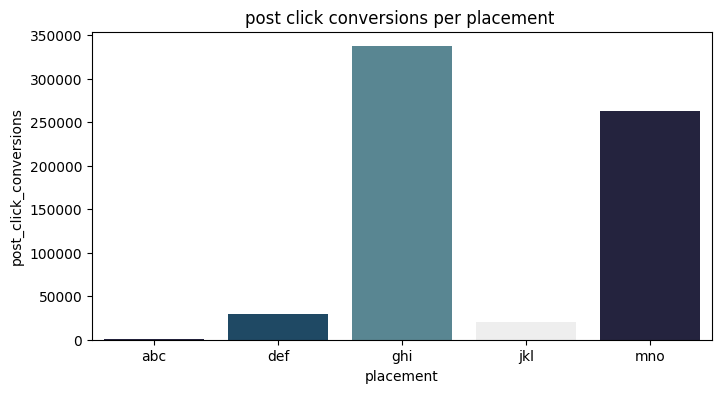

In [27]:
plt.figure(figsize = (8,4))
sns.barplot(x = grp.index ,y=  grp , palette = palet)
plt.title('post click conversions per placement ')
plt.show()

In [28]:
grp = df.groupby('campaign_number')[['displays','clicks']]
grp = grp.sum()
grp

,displays,clicks
campaign_number,,
camp 1,143311319,1409136
camp 2,45492269,881158
camp 3,50214137,202543


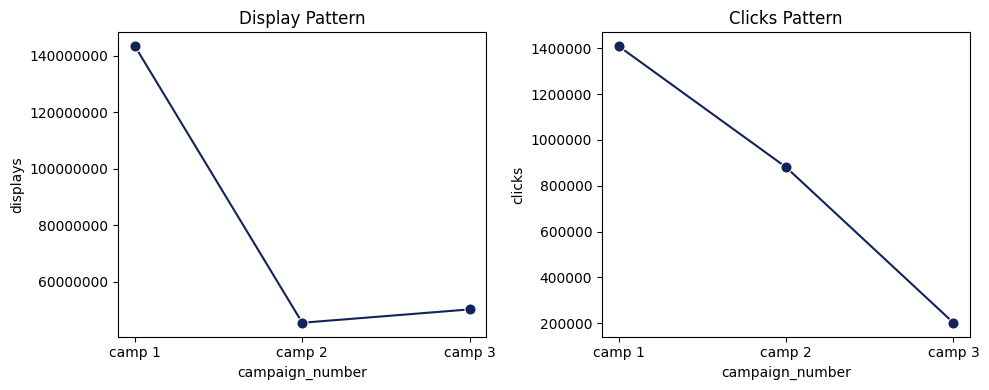

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)


sns.lineplot(x = grp.index ,y = grp['displays'] ,color ='#11235A',ax = axes[0], marker='o',markersize=8)
plt.title('display pattern ')
plt.ticklabel_format(style ='plain', axis = 'y' )
axes[0].set_title('Display Pattern')
axes[0].ticklabel_format(style='plain', axis='y')

sns.lineplot(x = grp.index ,y = grp['clicks'] ,color ='#11235A',ax = axes[1], marker='o',markersize=8)
axes[1].set_title('Clicks Pattern')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [30]:
grp = df.groupby('user_engagement')['revenue']
grp = grp.sum()
grp

,revenue
user_engagement,
High,212263.8837
Low,5146.2289
Medium,58854.4495


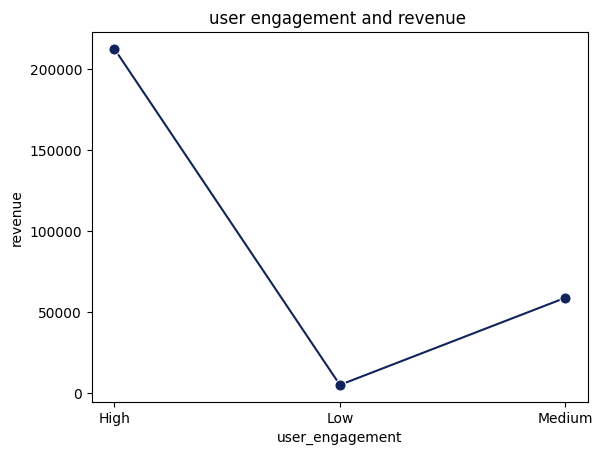

In [31]:
sns.lineplot(x = grp.index ,y =grp ,color= '#11235A', marker='o',markersize=8)
plt.title('user engagement and revenue ')
plt.show()

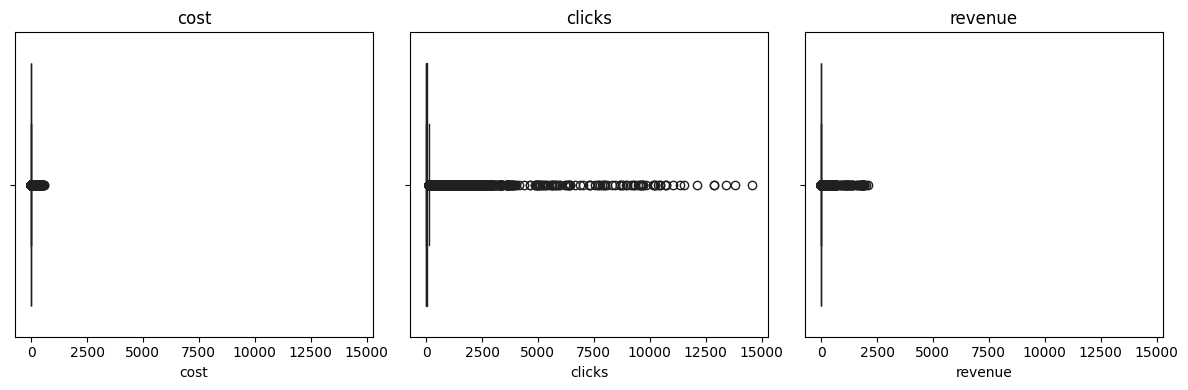

In [32]:
fig , axes = plt.subplots(1,3,figsize=(12,4),sharex=True)
j = 0
for i in ['cost','clicks','revenue'] :
  sns.boxplot(x =i ,data = df ,color= '#11235A',ax = axes[j])
  axes[j].set_title(i)
  axes[j].ticklabel_format(style='plain', axis='x')
  j+=1
plt.tight_layout()
plt.show()

In [33]:
grp = df.groupby('banner')['post_click_sales_amount']
grp = grp.sum()
grp

,post_click_sales_amount
banner,
160 x 600,2.405226e+06
240 x 400,1.359172e+07
300 x 250,6.379057e+06
468 x 60,2.784375e+04
580 x 400,1.634274e+06
670 x 90,5.141998e+05
728 x 90,8.163189e+06
800 x 250,1.122830e+02


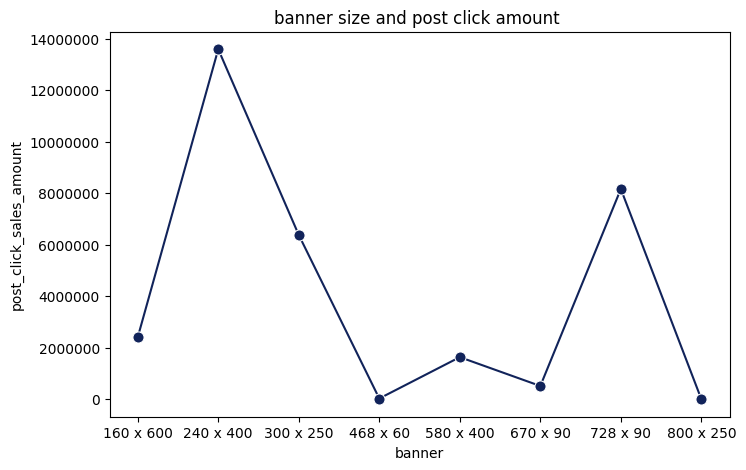

In [34]:
plt.figure(figsize =(8,5))
sns.lineplot(x =grp.index , y =grp ,color = '#11235A', marker='o',markersize=8)
plt.ticklabel_format(style ='plain' , axis ='y')
plt.title('banner size and post click amount ')
plt.show()

In [35]:
grp = df.groupby('placement')['post_click_conversions']
grp = grp.sum()
grp

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263172


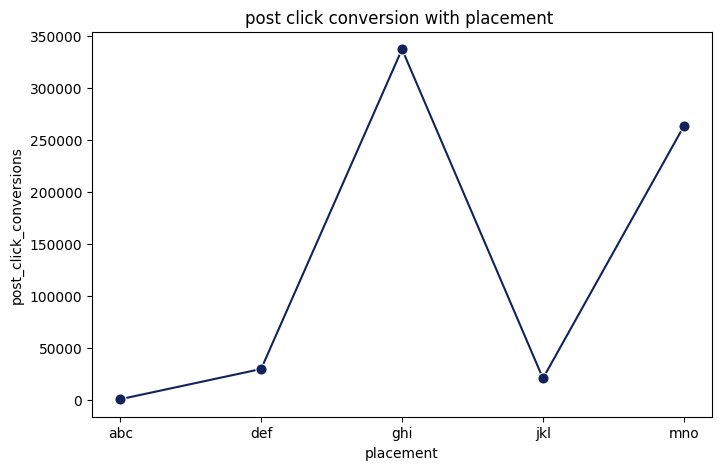

In [36]:
plt.figure(figsize =(8,5))
sns.lineplot(x =grp.index , y =grp ,color = '#11235A', marker='o',markersize=8)
plt.ticklabel_format(style ='plain' , axis ='y')
plt.title('post click conversion with placement ')
plt.show()

In [37]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [50]:
grp = df.groupby('campaign_number')[['cost','clicks']]
grp = grp.sum()
grp['CPC'] = grp['cost'] / grp['clicks']
grp

,cost,clicks,CPC
campaign_number,,,
camp 1,150688.5798,1409136,0.106937
camp 2,17037.3496,881158,0.019335
camp 3,7467.0663,202543,0.036867


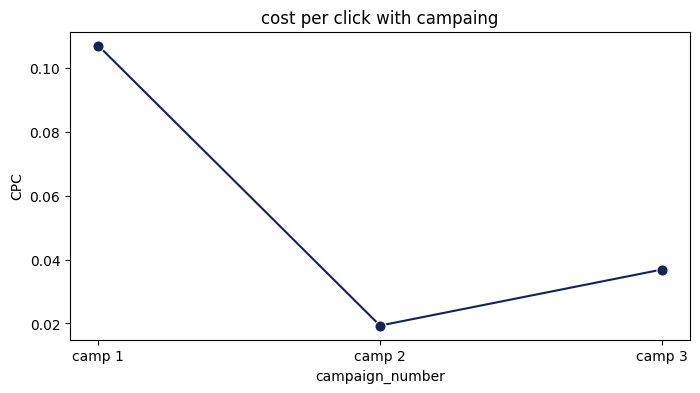

In [51]:
plt.figure(figsize = (8,4))
sns.lineplot(x = grp.index ,y =grp['CPC'] ,color = '#11235A',marker ='o',markersize =8 )
plt.title('cost per click with campaing')
plt.show()

In [52]:
grp = df.groupby('banner')[['cost','clicks']]
grp = grp.sum()
grp['CPC'] = grp['cost'] / grp['clicks']
grp

,cost,clicks,CPC
banner,,,
160 x 600,17516.4329,239570,0.073116
240 x 400,56415.6148,1113256,0.050676
300 x 250,35438.5266,411214,0.086180
468 x 60,192.6514,1295,0.148766
580 x 400,8978.5730,120681,0.074399
670 x 90,3817.9569,37203,0.102625
728 x 90,52830.4397,569606,0.092749
800 x 250,2.8004,12,0.233367


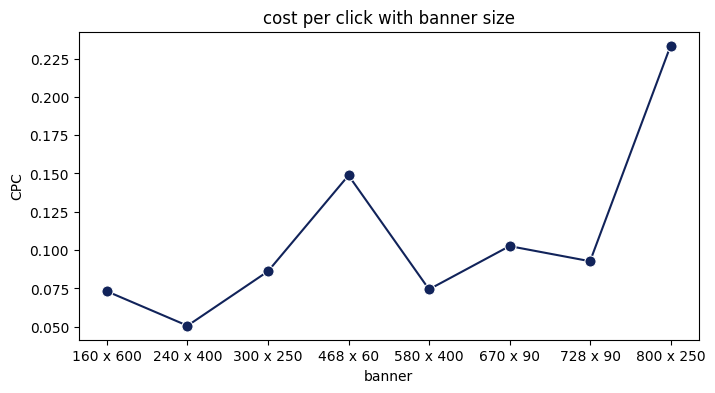

In [53]:
plt.figure(figsize = (8,4))
sns.lineplot(x = grp.index ,y =grp['CPC'] ,color = '#11235A',marker ='o',markersize =8 )
plt.title('cost per click with banner size')
plt.show()

In [55]:
grp = df.groupby('campaign_number')['post_click_conversions']
grp = grp.sum()
grp

,post_click_conversions
campaign_number,
camp 1,633085
camp 2,13767
camp 3,4916


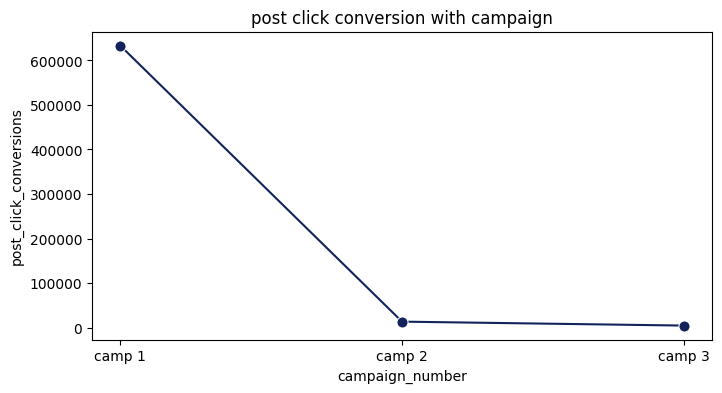

In [58]:
plt.figure(figsize = (8,4))
sns.lineplot(x =grp.index ,y =grp ,color ='#11235A',marker ='o',markersize =8)
plt.title('post click conversion with campaign')
plt.show()

In [59]:
grp = df.groupby('placement')['post_click_conversions']
grp = grp.sum()
grp

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263172


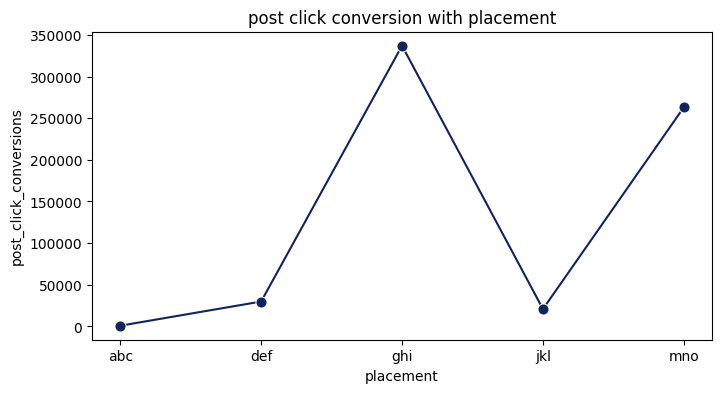

In [60]:
plt.figure(figsize = (8,4))
sns.lineplot(x =grp.index ,y =grp ,color ='#11235A',marker ='o',markersize =8)
plt.title('post click conversion with placement')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                15408 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB
